In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_original=cv2.imread("/Users/hyeokbeom/Desktop/graduation_work/test1.jpg")

In [3]:
def plt_imshow_bgr(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)

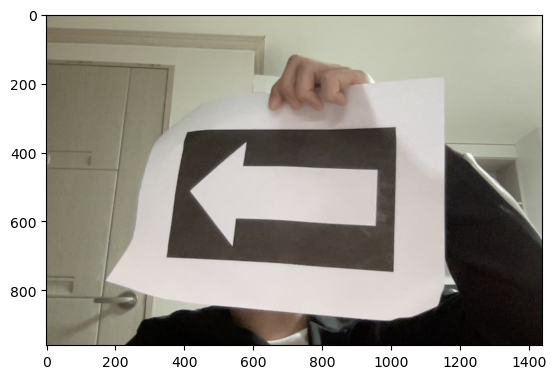

In [5]:
plt_imshow_bgr(img_original)

In [29]:
img=img_original.copy()
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,img_bin=cv2.threshold(gray,-1,255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

TypeError: order must be str, not bool

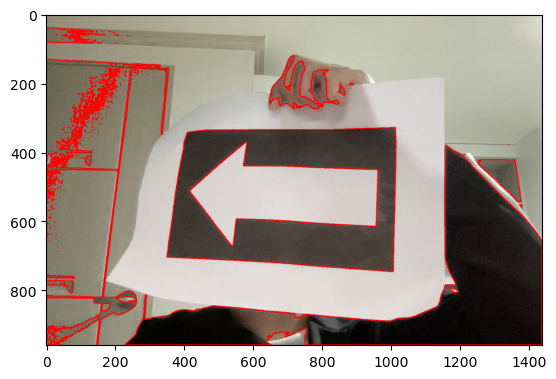

In [30]:
contours,_=cv2.findContours(img_bin,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
img1=img_original.copy()
cv2.drawContours(img1,contours,-1,(0,0,255),2)
plt_imshow_bgr(img1)

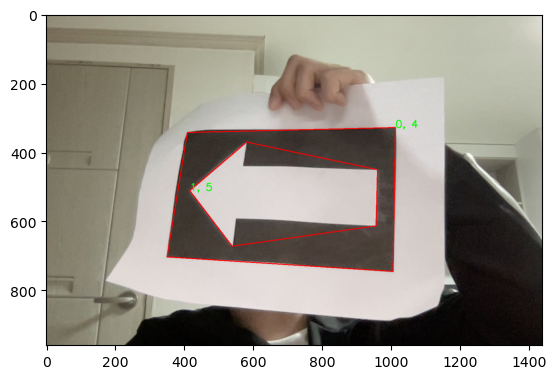

In [36]:
import shapely

img1=img.copy()
approxes={}
i=0

for contour in contours:
    if cv2.contourArea(contour) < 1000:  # 노이즈 제거, 너무 작으면 무시
        continue
    if not shapely.Polygon(contour[:, 0, :]).is_valid:
        continue
    hull=cv2.convexHull(contour,returnPoints=True)
    eps=cv2.arcLength(hull,True)
    approx=cv2.approxPolyDP(hull,eps*0.02,True)
    cv2.drawContours(img,[approx],-1,(0,0,255),2)
    cv2.putText(img,f"{i}, {len(approx[:,0])}",approx[0][0],cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    approxes[i]={"contour":contour,"hull":hull,"approx":approx}
    i+=1
plt_imshow_bgr(img)

In [41]:
hulp=cv2.convexHull(approxes[1]["contour"],returnPoints=False)
hulp

array([[   1],
       [   3],
       [ 457],
       [ 460],
       [ 461],
       [ 463],
       [ 470],
       [ 593],
       [ 613],
       [ 623],
       [ 624],
       [ 627],
       [1107],
       [1108],
       [1115],
       [1120],
       [1170],
       [1258],
       [1262],
       [1268],
       [1270],
       [1285],
       [1341],
       [1357],
       [1411],
       [1431],
       [1435]], dtype=int32)

In [34]:
hull

array([[0],
       [1],
       [2],
       [3]], dtype=int32)

In [43]:
contour=approxes[1]['contour']

In [46]:
hull=contour[hulp[:,0]]

In [49]:
contour

array([[[579, 372]],

       [[580, 371]],

       [[581, 371]],

       ...,

       [[576, 374]],

       [[577, 373]],

       [[578, 372]]], dtype=int32)

In [51]:
defects=cv2.convexityDefects(contour,hulp)
defects

array([[[ 1435,     1,     0,   114]],

       [[    3,   457,    72, 17709]],

       [[  457,   460,   458,   162]],

       [[  461,   463,   462,   114]],

       [[  463,   470,   465,   256]],

       [[  470,   593,   556,   308]],

       [[  593,   613,   594,   243]],

       [[  613,   623,   614,   229]],

       [[  624,   627,   626,   162]],

       [[  627,  1107,  1028, 19614]],

       [[ 1115,  1120,  1116,   160]],

       [[ 1120,  1170,  1153,   351]],

       [[ 1170,  1258,  1203,   415]],

       [[ 1258,  1262,  1259,   154]],

       [[ 1262,  1268,  1265,   213]],

       [[ 1270,  1285,  1272,   181]],

       [[ 1285,  1341,  1326,   292]],

       [[ 1341,  1357,  1345,   289]],

       [[ 1357,  1411,  1399,   331]],

       [[ 1411,  1431,  1417,   360]],

       [[ 1431,  1435,  1432,   154]]], dtype=int32)

In [53]:
hulp

array([[   1],
       [   3],
       [ 457],
       [ 460],
       [ 461],
       [ 463],
       [ 470],
       [ 593],
       [ 613],
       [ 623],
       [ 624],
       [ 627],
       [1107],
       [1108],
       [1115],
       [1120],
       [1170],
       [1258],
       [1262],
       [1268],
       [1270],
       [1285],
       [1341],
       [1357],
       [1411],
       [1431],
       [1435]], dtype=int32)